In [1]:
import numpy as np
import pandas as pd
import regex as re
import itertools
from collections import Counter
from wordcloud import WordCloud

##
import nltk 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

##
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
cust_reviews = pd.read_csv('data/BA_reviews.csv')
cust_reviews.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Old A320 with narrow pitch....
1,1,✅ Trip Verified | Another BA Shambles. Starte...
2,2,Not Verified | BA cancelled my flight home to...
3,3,"Not Verified | BA cancelled my flight home, t..."
4,4,✅ Trip Verified | Turned up 3.5 hours in advan...


In [3]:
cust_reviews.shape

(2000, 2)

In [4]:
cust_reviews.drop(cust_reviews.columns[cust_reviews.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
cust_reviews.head()

,reviews
0,✅ Trip Verified | Old A320 with narrow pitch....
1,✅ Trip Verified | Another BA Shambles. Starte...
2,Not Verified | BA cancelled my flight home to...
3,"Not Verified | BA cancelled my flight home, t..."
4,✅ Trip Verified | Turned up 3.5 hours in advan...


In [6]:
cust_reviews.tail()

,reviews
1995,Flew Ibiza to Gatwick with British Airways. A ...
1996,✅ Verified Review | London to Paris CDG in bu...
1997,✅ Verified Review | Every airline which offer...
1998,London City to Isle of Man on BA Cityflyer ope...
1999,✅ Verified Review | Amsterdam to Sao Paulo vi...


### Data Cleaning

In [7]:
def get_reviews(txt):

    if '|' in txt:
        return txt.split('|')[1].strip()
    else:
        return txt


In [8]:
# Remove Verified Part
cust_reviews['reviews']=cust_reviews['reviews'].apply(get_reviews)
cust_reviews.head()

,reviews
0,Old A320 with narrow pitch. Flight perfectly o...
1,Another BA Shambles. Started off well with exc...
2,BA cancelled my flight home to Heathrow on Dec...
3,"BA cancelled my flight home, the last flight o..."
4,"Turned up 3.5 hours in advance, Terminal 5 at ..."


In [9]:
def regex_clean(txt, regex):
    """Replace any text matching the regex

    Parameters
    ----------
    txt : string
        A text string that you want to parse and remove matches
    regex : string 
        A text string of the regex pattern you want to match

    Returns
    -------
    The same txt string with the matches removes
    """

    return " ".join(re.sub(regex, "", txt).split())

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [10]:
cust_reviews['cleaned'] = cust_reviews['reviews'].apply(str.lower)

regex_to_clean = [r'(@.+?)\s',
                  r'\s\d+\s',
                  r'(//t.co/.+?)\s',
                  r'(//t.co/.+?)'
]

for reg in regex_to_clean:
    cust_reviews['cleaned'] = cust_reviews['cleaned'].apply(regex_clean, regex=reg)
    
    
cust_reviews['cleaned'] = cust_reviews['cleaned'].apply(remove_emoji)
cust_reviews.head()


,reviews,cleaned
0,Old A320 with narrow pitch. Flight perfectly o...,old a320 with narrow pitch. flight perfectly o...
1,Another BA Shambles. Started off well with exc...,another ba shambles. started off well with exc...
2,BA cancelled my flight home to Heathrow on Dec...,ba cancelled my flight home to heathrow on dec...
3,"BA cancelled my flight home, the last flight o...","ba cancelled my flight home, the last flight o..."
4,"Turned up 3.5 hours in advance, Terminal 5 at ...","turned up 3.5 hours in advance, terminalat lon..."


In [11]:
cust_reviews['cleaned'] = cust_reviews['cleaned'].apply(remove_emoji)

cust_reviews['tokens'] = cust_reviews['cleaned'].apply(word_tokenize)

cust_reviews.head()

,reviews,cleaned,tokens
0,Old A320 with narrow pitch. Flight perfectly o...,old a320 with narrow pitch. flight perfectly o...,"[old, a320, with, narrow, pitch, ., flight, pe..."
1,Another BA Shambles. Started off well with exc...,another ba shambles. started off well with exc...,"[another, ba, shambles, ., started, off, well,..."
2,BA cancelled my flight home to Heathrow on Dec...,ba cancelled my flight home to heathrow on dec...,"[ba, cancelled, my, flight, home, to, heathrow..."
3,"BA cancelled my flight home, the last flight o...","ba cancelled my flight home, the last flight o...","[ba, cancelled, my, flight, home, ,, the, last..."
4,"Turned up 3.5 hours in advance, Terminal 5 at ...","turned up 3.5 hours in advance, terminalat lon...","[turned, up, 3.5, hours, in, advance, ,, termi..."


# Remove Stopwords

In [12]:
stpwrd = nltk.corpus.stopwords.words('english')
punc = '!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\''

punc = [x for x in punc]

stpwrd.extend(['rt', '#', 'fav', '', ':', '@', '!', ';', '…','...', '(', ')', 'using', 'via', 'flight','https',"'",'‘','ba'])
stpwrd.extend(punc)


In [13]:
##
cust_reviews['tokens'] = cust_reviews['tokens'].apply(lambda x:[words for words in x if words not in stpwrd])
cust_reviews.head()


,reviews,cleaned,tokens
0,Old A320 with narrow pitch. Flight perfectly o...,old a320 with narrow pitch. flight perfectly o...,"[old, a320, narrow, pitch, perfectly, time, co..."
1,Another BA Shambles. Started off well with exc...,another ba shambles. started off well with exc...,"[another, shambles, started, well, excellent, ..."
2,BA cancelled my flight home to Heathrow on Dec...,ba cancelled my flight home to heathrow on dec...,"[cancelled, home, heathrow, dec, 19th, face, s..."
3,"BA cancelled my flight home, the last flight o...","ba cancelled my flight home, the last flight o...","[cancelled, home, last, day, heathrow, tried, ..."
4,"Turned up 3.5 hours in advance, Terminal 5 at ...","turned up 3.5 hours in advance, terminalat lon...","[turned, 3.5, hours, advance, terminalat, lond..."


## Token Counters

In [15]:
token_counts = Counter()
cust_reviews['tokens'].apply(token_counts.update)

dict_tokens = {k: v for k, v in dict(token_counts).items() if v>200}
token_counts = Counter(dict_tokens)

print(token_counts)

Counter({'service': 1621, 'london': 1564, 'food': 1242, 'seat': 1208, 'british': 1157, 'airways': 1148, 'crew': 1144, 'time': 1109, 'class': 1053, 'cabin': 1042, 'good': 998, 'seats': 987, "n't": 986, 'one': 943, 'heathrow': 923, 'would': 908, 'business': 889, 'staff': 852, 'economy': 757, 'get': 755, '’': 701, 'airline': 677, 'first': 645, 'could': 644, 'us': 598, 'flights': 587, 'boarding': 586, 'back': 577, "'s": 576, 'plane': 574, 'even': 565, 'passengers': 553, 'lounge': 527, 'return': 517, 'experience': 500, 'check': 499, 'meal': 491, 'club': 482, 'told': 480, 'aircraft': 472, 'fly': 466, 'new': 455, 'customer': 440, 'like': 428, 'airlines': 421, 'airport': 407, 'premium': 395, 'drinks': 389, 'two': 388, 'well': 386, 'really': 385, 'also': 380, 'long': 377, 'offered': 375, 'got': 374, 'flying': 368, 'better': 356, 'served': 343, 'much': 340, 'poor': 340, 'luggage': 338, "''": 338, 'way': 333, 'made': 330, 'still': 329, 'another': 327, 'board': 325, 'due': 323, 'bag': 323, 'gatwic

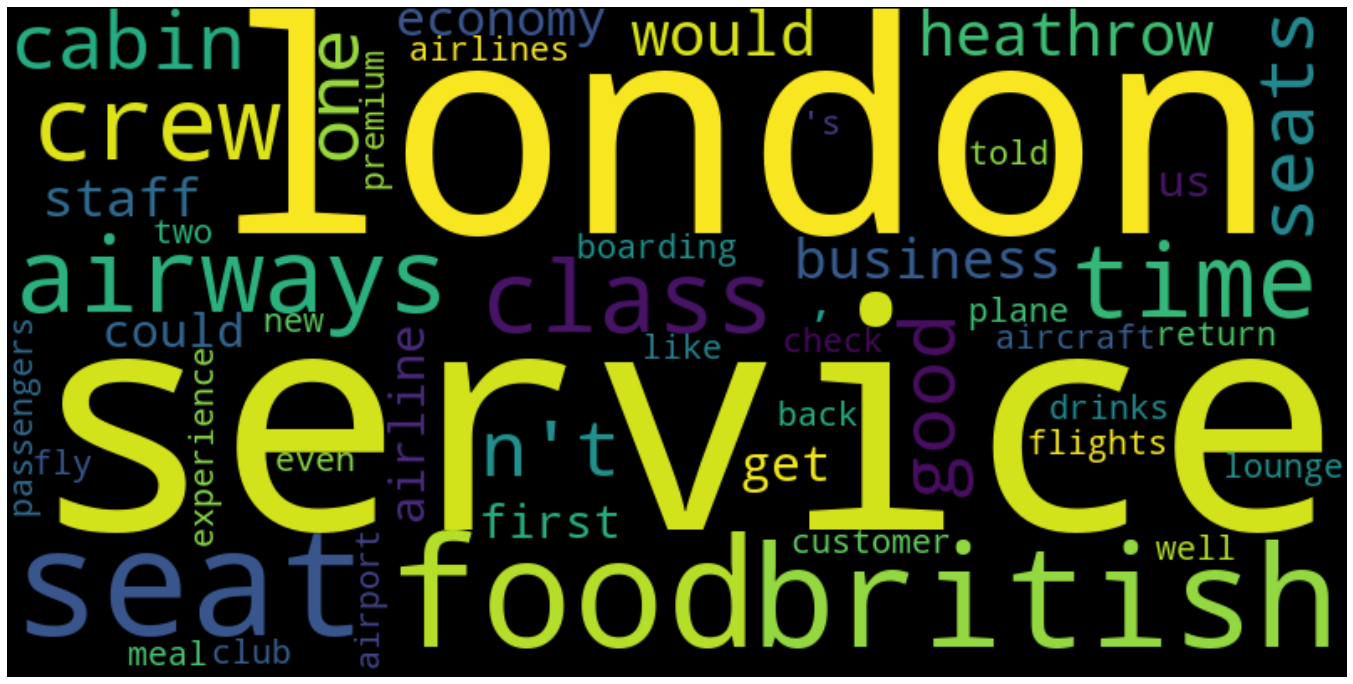

In [16]:
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(token_counts)
plt.figure(figsize=(24,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
cust_reviews.to_csv("data/cleaned_reviews.csv")